In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(f"Training data shape: {train_data.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing data shape: {test_data.shape}")
print(f"Testing labels shape: {test_labels.shape}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000,)
Training labels shape: (25000,)
Testing data shape: (25000,)
Testing labels shape: (25000,)


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 256
train_data = pad_sequences(train_data, maxlen=max_len, padding='post')
test_data = pad_sequences(test_data, maxlen=max_len, padding='post')

print(f"Padded training data shape: {train_data.shape}")
print(f"Padded testing data shape: {test_data.shape}")

Padded training data shape: (25000, 256)
Padded testing data shape: (25000, 256)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

vocabulary_size = 10000
embedding_dim = 128

model = Sequential([
    Embedding(vocabulary_size, embedding_dim),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])
model.build(input_shape=(None, max_len))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 256, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 252, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,362,177 (5.20 MB)

 Trainable params: 1,362,177 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 154ms/step - accuracy: 0.7350 - loss: 0.5131 - val_accuracy: 0.8884 - val_loss: 0.2692
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 189ms/step - accuracy: 0.9317 - loss: 0.1823 - val_accuracy: 0.8906 - val_loss: 0.2653
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 180ms/step - accuracy: 0.9794 - loss: 0.0759 - val_accuracy: 0.8814 - val_loss: 0.3142
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 177ms/step - accuracy: 0.9966 - loss: 0.0242 - val_accuracy: 0.8890 - val_loss: 0.3344
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 177ms/step - accuracy: 0.9999 - loss: 0.0058 - val_accuracy: 0.8874 - val_loss: 0.3839
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 154ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.8880 - val_loss: 0.4140
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 162s 180ms/step - accuracy: 1.0000 - loss: 7.5397e-04 - val_accuracy: 0.8871 - val_loss: 0.4444
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 154ms/step - accuracy: 1.00

In [8]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8901 - loss: 0.5118

Test Accuracy: 0.8866
Test Loss: 0.5210


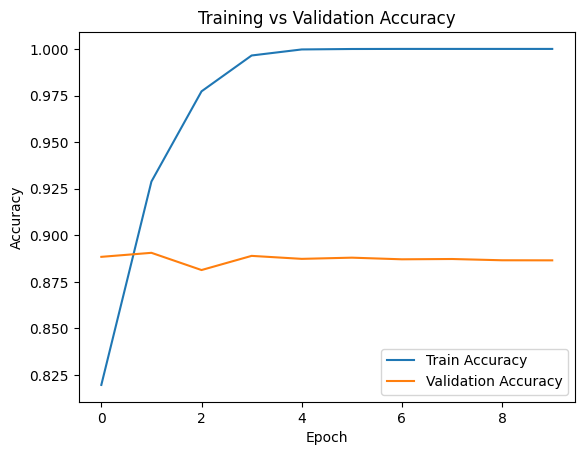

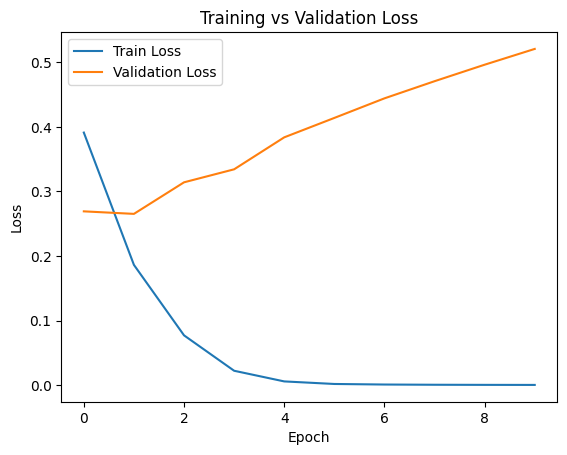

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [10]:
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

def predict_review(text):

    tokens = text.lower().split()
    encoded = [(word_index.get(word, 2) + 3) for word in tokens]
    padded = pad_sequences([encoded], maxlen=max_len, padding='post')

    pred = model.predict(padded)[0][0]
    sentiment = "Positive" if pred >= 0.5 else "Negative"
    return sentiment, pred

sample_text = "This movie was absolutely fantastic with great acting"
sentiment, score = predict_review(sample_text)
print(f"Sentiment: {sentiment} (score = {score:.4f})")


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Sentiment: Positive (score = 0.9999)


In [11]:
model.save("imdb_cnn_model.h5")
print("Model saved successfully!")

Model saved successfully!
